In [106]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import re


def load_json_to_dataframe(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        data = json.load(file)
    return pd.DataFrame(data['data'])

def jitter_labels(y, sigma=0.05):
    """Adding random noise to the data"""
    return np.clip(np.random.normal(y, sigma), 0, 1)

# Data from Homepage
data is from API

In [107]:
link_homepage = '../data/homepage_posts_data.json'
df_homepage = load_json_to_dataframe(link_homepage)

In [108]:
df_homepage.columns

Index(['id', 'created_at', 'title', 'slug', 'description', 'source', 'author',
       'published_at', 'votes', 'voted', 'comments', 'tags', 'hot', 'adult',
       'media', 'editable', 'deletable', 'resource', 'actions', 'archive',
       'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable',
       'recommended', 'family_friendly', 'favourite', 'alerts', 'ama'],
      dtype='object')

In [109]:
df_homepage = df_homepage.drop(columns=[
    'created_at', 'source', 'slug', 'published_at', 'hot', 'adult', 'media', 'observed_discussion', 'parent', 'tag_pinned_content', 'pinnable', 'editable', 'deletable', 'resource', 'actions', 'archive', 'recommended', 'family_friendly', 'favourite', 'ama', 'voted'
])

In [110]:
df_homepage['author'] = df_homepage['author'].apply(lambda x: x['username'])
df_homepage['downvotes'] = df_homepage['votes'].apply(lambda x: x['down'])
df_homepage['votes'] = df_homepage['votes'].apply(lambda x: x['up'])

In [111]:
df_homepage

,id,title,description,author,votes,comments,tags,alerts,downvotes
0,7766021,Pracujących Polaków nie stać nawet na metr mie...,Polaków nie stać na zakup nawet 1 m kw. mieszk...,ross-flow,485,"{'hot': False, 'count': 222}","[nieruchomosci, wynajem, rynekwtorny, mieszkania]",[],13
1,7798801,"Owczarki zaatakowały jamnika. Brutus nie żyje,...",To był spacer jak każdego innego dnia. Nagle ł...,coiber,631,"{'hot': False, 'count': 101}","[lodz, psy, pies, psiarze, bekazpodludzi]",[],30
2,7667729,Mocne oświadczenie PZN po aferze w skokach. Li...,Tymczasowe zawieszenie sztabu szkoleniowego i ...,Bobito,288,"{'hot': False, 'count': 56}","[sport, skoki, skokinarciarskie, swiat]",[],4
3,7798789,Jak ojciec Sebastiana M. stracił milion złotyc...,"Właścicielem pojazdu był Jarosław M., ojciec S...",Kolekcjoner_dusz,707,"{'hot': False, 'count': 207}","[sebastianmajtczak, majtczak, polskiedrogi, wy...",[],4
4,7766029,zus anulował rente,"mieszkanka Szczecina, miała 27 lat, gdy straci...",stefan_1971,458,"{'hot': False, 'count': 123}","[zus, renta]",[],10
...,...,...,...,...,...,...,...,...,...
9858,7733231,xcancel.com - przeglądaj twitty I odpowiedzi b...,"W sumie trochę mnie dziwi, ze ta stronka nie j...",Returned,438,"{'hot': False, 'count': 32}","[technologia, twitter, lifehack, internet]",[],5
9859,7700465,Tani sposób Niemców na oczyszczanie wody. W Po...,"Nowe badanie pokazuje, że mikroplastiki i toks...",Rasteris,427,"{'hot': False, 'count': 53}","[woda, przyroda, nauka, technika, las]",[],9
9860,7798775,"Zabił rodzinę, uciekł ze szpitala. Dożywocia n...","Prokuratura żądała dożywocia, sąd się na to ni...",ZobaczLink,235,"{'hot': False, 'count': 28}","[polska, prawo, sadowehistorie, kryminalne, mo...",[],1
9861,7733241,Zabrali i umieścili w rodzinie zastępczej. Czt...,Policja odebrała i umieściła w rodzinie zastęp...,Kolekcjoner_dusz,543,"{'hot': False, 'count': 185}","[warszawa, policja, afera]",[],58


# Data from id scan

In [112]:
link = '../data/final_combined_results_7631933-7651933.json'
df_id = load_json_to_dataframe(link)

In [113]:
df_id.columns

Index(['id', 'url', 'title', 'points', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'status', 'proxy', 'error'],
      dtype='object')

In [114]:
df_id = df_id[df_id['error'].isna()]

In [115]:
df_id = df_id.drop(columns=['status', 'proxy', 'error']).reset_index(drop=True)

In [116]:
alerts_df_id = df_id[df_id['alerts'].notna()]
alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))
print("Count of alerts: ", len(alerts_df_id))

# Check if all alerts are either 'zakopane' or 'duplikat'
zakopane_duplikat = (alerts_df_id['zakopane'] | alerts_df_id['duplikat']).all()

if zakopane_duplikat:
    print("All alerts are either 'zakopane' or 'duplikat'")
    
    # Remove the 'alerts' column as it is no longer needed
    alerts_df_id = alerts_df_id.drop(columns=['alerts'])

    # can remove duplicates now
    alerts_df_id = alerts_df_id[~alerts_df_id['duplikat']].drop(columns=['duplikat'])

Count of alerts:  1153
All alerts are either 'zakopane' or 'duplikat'


C:\Users\juziu\AppData\Local\Temp\ipykernel_23580\3722623095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['zakopane'] = alerts_df_id['alerts'].apply(lambda x: x['title'] == 'To Znalezisko zostało zakopane')
C:\Users\juziu\AppData\Local\Temp\ipykernel_23580\3722623095.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alerts_df_id['duplikat'] = alerts_df_id['alerts'].apply(lambda x: (x['title'] == 'To Znalezisko zostało wyrzucone') and ('Duplikat' in x['body']))


## Get comments and see if they contain information about manipulation and check their points

**NOTE**: this is still important to check because word 'manipulation' can also not address the original post

In [117]:
# content: None means that there was some multimedia posted and no text
df_id['comments_content_points'] = df_id['comments'].apply(lambda x: [(c['content'], c['points']) for c in x if c['content'] is not None])

In [118]:
import re
pattern = re.compile(r'\bmanipula\w*\b', flags=re.IGNORECASE)

df_id['mentions_manipulation'] = df_id['comments_content_points'] \
    .apply(lambda list_c:
        any(pattern.search(c[0]) for c in list_c if isinstance(c[0], str))
    )

In [119]:
df_id['top_manipulation_comment'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if pattern.search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

## Is comment containing 'informacja nieprawdziwa' or 'nieprawdziwa informacja'

In [120]:
df_id['comment_informacja_nieprawdziwa'] = df_id['comments_content_points'].apply(
    lambda comments: max(
        (c for c in comments if re.compile(r'informacja nieprawdziwa|nieprawdziwa informacja', re.IGNORECASE).search(c[0])),
        key=lambda c: c[1],
        default=None
    )
)

In [121]:
df_id['comment_informacja_nieprawdziwa'].notna().sum()

np.int64(53)

In [122]:
comment_informacja_nieprawdziwa_points = df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['comment_informacja_nieprawdziwa'].apply(lambda x: x[1])\
      / df_id[df_id['comment_informacja_nieprawdziwa'].notna()]['points'].abs()

df_id.loc[comment_informacja_nieprawdziwa_points.index, 'score_informacja_nieprawdziwa'] = comment_informacja_nieprawdziwa_points

### Method involves label smoothing - model will not generalize well possibly

In [123]:
df_id.loc[alerts_df_id.index, 'score_zakopane_fuzzy'] = np.clip(
    np.random.normal(loc=0.7, scale=0.05, size=len(alerts_df_id.index)),
    0, 1
)

df_id.loc[alerts_df_id.index, 'score_zakopane'] = 0.7

In [124]:
df_id['scores_fuzzy'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane_fuzzy']].sum(axis=1, skipna=True).fillna(0)
df_id['scores'] = df_id[['score_informacja_nieprawdziwa', 'score_zakopane']].sum(axis=1, skipna=True).fillna(0)

In [125]:
# only for the fuzzy values
df_id.loc[df_id[df_id['scores_fuzzy'] == 0].index, 'scores_fuzzy'] = np.clip(
    np.random.normal(loc=0, scale=0.05, size=len(df_id[df_id['scores_fuzzy'] == 0].index)),
    0, 1
)

In [126]:
df_id = df_id.rename(columns={'points': 'votes'})

# Data from Misinformation archive
https://wykoppl-informacjanieprawdziwa.surge.sh/

In [127]:
df_misinfo = load_json_to_dataframe('../data/mssinfo_wykop_posts.json')

In [128]:
df_misinfo['scores'] = 1

df_misinfo['scores_fuzzy'] = np.clip(
    np.random.normal(loc=1, scale=0.05, size=len(df_misinfo.index)),
    0, 1
)

# Analysis

Data From ID scan: `df`  
Data from homepage: `df_homepage`  
Data from misinfo list: `df_misinfo`

In [129]:
df_homepage.columns

Index(['id', 'title', 'description', 'author', 'votes', 'comments', 'tags',
       'alerts', 'downvotes'],
      dtype='object')

For now, `df_homepage` is not yet to be joined because the comments are not fetched

In [130]:
df_id.columns

Index(['id', 'url', 'title', 'votes', 'description', 'added_date', 'tags',
       'alerts', 'comments', 'comments_content_points',
       'mentions_manipulation', 'top_manipulation_comment',
       'comment_informacja_nieprawdziwa', 'score_informacja_nieprawdziwa',
       'score_zakopane_fuzzy', 'score_zakopane', 'scores_fuzzy', 'scores'],
      dtype='object')

In [131]:
df_misinfo.columns

Index(['id', 'url', 'title', 'description', 'added_date', 'author', 'tags',
       'alerts', 'votes', 'downvotes', 'scores', 'scores_fuzzy'],
      dtype='object')

In [132]:
df_id_ready = df_id.drop(columns=[
    'id', 'url', 'added_date', 'alerts', 'comments', 'comments_content_points', 
    'mentions_manipulation', 'top_manipulation_comment', 'comment_informacja_nieprawdziwa',
    'score_informacja_nieprawdziwa', 'score_zakopane'
    ]
)

In [133]:
df_id_ready.head()

,title,votes,description,tags,score_zakopane_fuzzy,scores_fuzzy,scores
0,Rządy PiS bez cenzury,2.0,Złoty interes,"[polityka, biznes, bekazpisu]",NaN,0.012808,0.0
1,Elon Musk robi Hitlera na wiecu prezydenckim,5.0,Nasi dziadkowie przewracają się w grobach.,"[elon, musk, wiec, hitler]",0.692983,0.692983,0.7
2,K. Nawrocki przez pół roku mieszkał w apartame...,828.0,Karol Nawrocki jako dyrektor Muzeum II Wojny Ś...,"[polityka, wybory, sejm, pis]",NaN,0.000000,0.0
3,Elon Musk chce kupić Intela,12.0,"Nieoczekiwany zwrot u Intela. Okazuje się, że ...","[elonmusk, intel, technologia]",NaN,0.009849,0.0
4,Pierwsze decyzje Donalda Trumpa.,3.0,Pierwsze decyzje Donalda Trumpa.,"[ekonomia, usa, trump, wydarzeniaswiatedek, sw...",NaN,0.004501,0.0


In [134]:
df_misinfo_ready = df_misinfo.drop(columns=[
    'id', 'url', 'added_date', 'author', 'alerts', 'downvotes'
    ]
)

In [135]:
df_misinfo_ready.head()

,title,description,tags,votes,scores,scores_fuzzy
0,We Francji spokojnie. W sylwestra spalono tylk...,"W noc sylwestrową we Francji spalono ""tylko"" 9...","[europa, swiat, imigranci, ciekawostki, francja]",2305,1,1.000000
1,[Afera Prezydencka] Moderator fDy,A gdyby tak większa ilość użytkowników #wykop ...,"[wykop, afera, aferaprezydecka, lechwalesacont...",428,1,1.000000
2,Szczera wypowiedź Tomasza Lisa,pan redaktor w końcu powiedział co tak naprawd...,"[polityka, heheszki, lisnadzis, kod, media]",1357,1,0.974347
3,Inwazja zombie-islamu na Europę stała się fakt...,Zobaczcie jak przybysze bawią się z Niemką w c...,"[europa, islam, imigranci, kolonia, uchodzcy, ...",145,1,0.946137
4,Czy tak wyglądały ataki w Koloni w Nowy Rok?,Podejrzewam że to dopiero początek wrzut tego ...,"[europa, imigranci, islam]",33,1,1.000000


In [136]:
df = pd.concat([df_misinfo_ready, df_id_ready], ignore_index=True)

In [137]:
df['scores'] = df['scores'].apply(lambda x: min(1, max(0, x)))
df['scores_fuzzy'] = df['scores_fuzzy'].apply(lambda x: min(1, max(0, x)))

<Axes: ylabel='Frequency'>

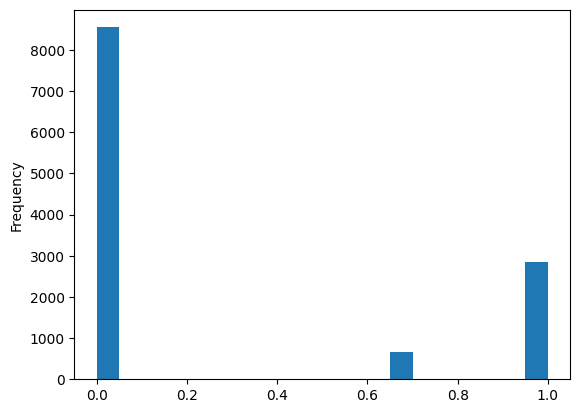

In [138]:
df['scores'].sort_values().plot(kind='hist', bins=20)

<Axes: ylabel='Frequency'>

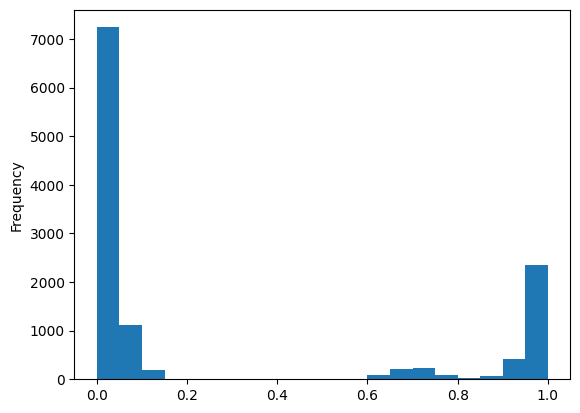

In [139]:
df['scores_fuzzy'].sort_values().plot(kind='hist', bins=20)

# Preparing the data

In [140]:
df["text"] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('') + " " +
    df["tags"].apply(lambda x: " ".join(x) if isinstance(x, list) else x)
)

# Alternative way - exclude the tags, they might be too much of an outlier
df['clean_text_no_tags'] = (
    df["title"].fillna('') + " " +
    df["description"].fillna('')
)

In [141]:
def clean_text(t):
    def _normalize_polish_characters(text):
        mapping = {
            "ą": "a", "ć": "c", "ę": "e", "ł": "l",
            "ń": "n", "ó": "o", "ś": "s", "ź": "z", "ż": "z",
            "Ą": "A", "Ć": "C", "Ę": "E", "Ł": "L",
            "Ń": "N", "Ó": "O", "Ś": "S", "Ź": "Z", "Ż": "Z"
        }
        for k, v in mapping.items():
            text = text.replace(k, v)
        return text
    t = t.lower()
    t = _normalize_polish_characters(t)
    t = re.sub(r"http\S+", "", t)
    t = re.sub(r"[^a-z0-9\s]", "", t)
    return t.strip()

df["clean_text"] = df["text"].apply(clean_text)

In [142]:
df['clean_text'].head()

0    we francji spokojnie w sylwestra spalono tylko...
1    afera prezydencka moderator fdy a gdyby tak wi...
2    szczera wypowiedz tomasza lisa pan redaktor w ...
3    inwazja zombieislamu na europe stala sie fakte...
4    czy tak wygladaly ataki w koloni  w nowy rok p...
Name: clean_text, dtype: object

# Initial model

In [143]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["scores"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(
    max_features=10000,
    ngram_range=(1,2),
    min_df=2
)

X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

model = Ridge(alpha=1.0)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.2337652476464169
R²: 0.49724698300236236


In [144]:
for pr, ts, x_ts, _ in zip(y_pred, y_test, X_test, range(10)):
    print(pr, ts, x_ts)

0.6071713596178773 1.0 uk obniza vat z 20 do 5 na wszystkie produkty w sklepach  taka pomoc dla obywateli na 6mcy europa uk vat ekonomia polityka
0.05410876030552603 0.0 rok jedzenia chicken sandwich w popeyes za darmo kolejnym otwarciom nowych lokali popeyes w polsce towarzyszy promocja w ktorej na klientow czeka az rok darmowego jedze popeyes promocja darmo kurczak
0.4725784451814161 1.0 to tylko jakis patent   patent z 2015 roku teoriespiskowe patent covid19
0.06321447168304364 0.0 microsoft account od lutego duza zmiana w logowaniu sie do konta od lutego jesli zalogujesz sie uzytkownicy beda automatycznie zalogowani caly czas istnieje nowa globalna opcja wylogowania wyloguj sie wszedzie moze to potrwac do 24 godzin zanim microsoft wyloguje uzytkownika ze wszystkich urzadzen chyba ich troche ponioslo microsoft windows cyberbezpieczenstwo security cybersecurity komputery
0.321180628316601 0.0 rzad w uk domaga sie dostepu do szyfrowanych danych uzytkownikow apple eng brytyjski the hom

## Change problem to classification

In [145]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.35 else (2 if x > 0.85 else 1))

df["label"].value_counts(normalize=True)

label
0    0.710119
2    0.235104
1    0.054777
Name: proportion, dtype: float64

In [146]:
df = df[~df['clean_text'].duplicated()].reset_index(drop=True)

              precision    recall  f1-score   support

           0      0.906     0.848     0.876      1714
           1      0.239     0.371     0.291       132
           2      0.783     0.835     0.808       552

    accuracy                          0.819      2398
   macro avg      0.643     0.685     0.658      2398
weighted avg      0.841     0.819     0.828      2398



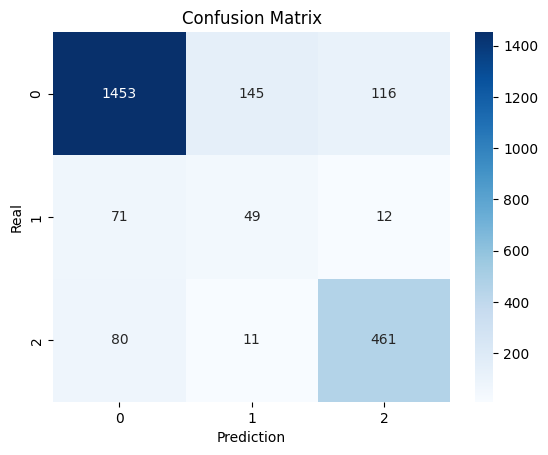

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def train_tfidf_logistic_regression_model(df, x_column: str, y_column: str):
    X_train, X_test, y_train, y_test = train_test_split(
        df[x_column], df[y_column], test_size=0.2, random_state=42, stratify=df["label"]
    )


    model = Pipeline([
        ("tfidf", TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=2)),
        ("clf", LogisticRegression(max_iter=1000, class_weight='balanced'))
    ])

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred, digits=3))

    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Prediction")
    plt.ylabel("Real")
    plt.title("Confusion Matrix")
    plt.show()
    
    return model

model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label")

### Class balancing

In [148]:
df['label'].value_counts()[0] / df['label'].value_counts()

label
0     1.000000
2     3.104710
1    12.963691
Name: count, dtype: float64

              precision    recall  f1-score   support

           0      0.935     0.850     0.890      1714
           1      0.922     0.996     0.958      1714
           2      0.929     0.938     0.933      1714

    accuracy                          0.928      5142
   macro avg      0.928     0.928     0.927      5142
weighted avg      0.928     0.928     0.927      5142



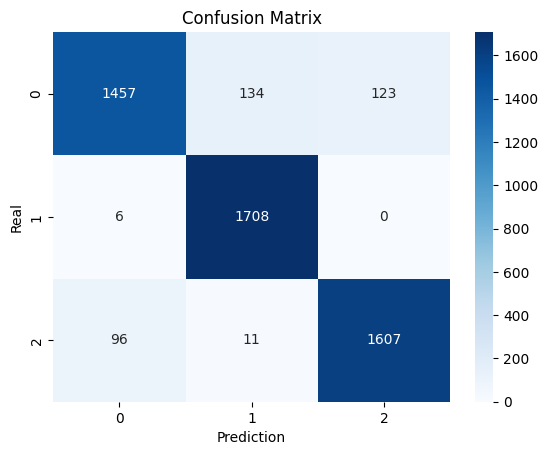

In [149]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority1 = df[df.label == 1]
minority2 = df[df.label == 2]

minority1_upsampled = resample(minority1, replace=True, n_samples=len(majority), random_state=42)
minority2_upsampled = resample(minority2, replace=True, n_samples=len(majority), random_state=42)

df_balanced = pd.concat([majority, minority1_upsampled, minority2_upsampled])

# Retraining
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text", y_column="label")

In [150]:
def show_most_important_words_multiclass(pipeline_model, top_n=15, show_discriminative=True):
    """
    pipeline_model: Pipeline with steps 'tfidf' i 'clf'
    top_n: how many words to show for each class
    show_discriminative: to show the most discrimative variable
    """
    try:
        vectorizer = pipeline_model.named_steps['tfidf']
        clf = pipeline_model.named_steps['clf']
    except Exception as e:
        raise ValueError("Model should contain Pipeline with steps: 'tfidf' i 'clf'.") from e

    feature_names = np.array(vectorizer.get_feature_names_out())
    coefs = clf.coef_
    
    if coefs.ndim == 1:
        coefs = coefs.reshape(1, -1)

    n_classes = coefs.shape[0]
    classes = clf.classes_

    for i, cls in enumerate(classes):
        if len(classes) == 2 and i == 1:
            break
        
        print(f"\n\n=== Class: {cls} (index {i}) ===")
        coef_i = coefs[i]

        top_pos_idx = np.argsort(coef_i)[-top_n:][::-1]
        print(f"\nTop {top_n} features for class {cls}:")
        for idx in top_pos_idx:
            print(f"{feature_names[idx]} ({coef_i[idx]:.4f})")

        top_neg_idx = np.argsort(coef_i)[:top_n]
        print(f"\nTop {top_n} features against class {cls}:")
        for idx in top_neg_idx:
            print(f"{feature_names[idx]} ({coef_i[idx]:.4f})")

        if show_discriminative and n_classes > 1:
            others_max = np.max(np.delete(coefs, i, axis=0), axis=0)
            discriminative_score = coef_i - others_max
            top_disc_idx = np.argsort(discriminative_score)[-top_n:][::-1]
            print(f"\nTop {top_n} the most discrimative features {cls}:")
            for idx in top_disc_idx:
                print(f"{feature_names[idx]} (diff={discriminative_score[idx]:.4f}, coef={coef_i[idx]:.4f})")
    
show_most_important_words_multiclass(model, 5)



=== Class: 0 (index 0) ===

Top 5 features for class 0:
nieruchomosci (3.1310)
2024 (2.5676)
polityka (2.2272)
historia (2.2202)
wypadek (2.1701)

Top 5 features against class 0:
swiat (-4.6907)
koronawirus (-4.3846)
wykop (-4.2594)
szczepienia (-2.9534)
covid19 (-2.9006)

Top 5 the most discrimative features 0:
nieruchomosci (diff=4.1523, coef=3.1310)
2024 (diff=3.1757, coef=2.5676)
wypadek (diff=3.0509, coef=2.1701)
gry (diff=3.0407, coef=2.1096)
inwestycje (diff=2.7482, coef=1.9798)


=== Class: 1 (index 1) ===

Top 5 features for class 1:
wosp (2.9898)
pomoc (2.3460)
wynajem (2.2534)
musk (2.2231)
kanalzero (2.1968)

Top 5 features against class 1:
swiat (-3.7873)
polska (-3.3101)
ze (-3.0972)
na (-2.8914)
przez (-2.8032)

Top 5 the most discrimative features 1:
wosp (diff=4.0458, coef=2.9898)
pomoc (diff=3.4057, coef=2.3460)
musk (diff=3.2526, coef=2.2231)
kanalzero (diff=3.2481, coef=2.1968)
owsiak (diff=2.9838, coef=2.1234)


=== Class: 2 (index 2) ===

Top 5 features for clas

### Looks like many of these words are tags - they are associated with some label

Let's try to mitigate that and discard tags

              precision    recall  f1-score   support

           0      0.915     0.821     0.865      1714
           1      0.926     0.994     0.959      1714
           2      0.895     0.921     0.908      1714

    accuracy                          0.912      5142
   macro avg      0.912     0.912     0.911      5142
weighted avg      0.912     0.912     0.911      5142



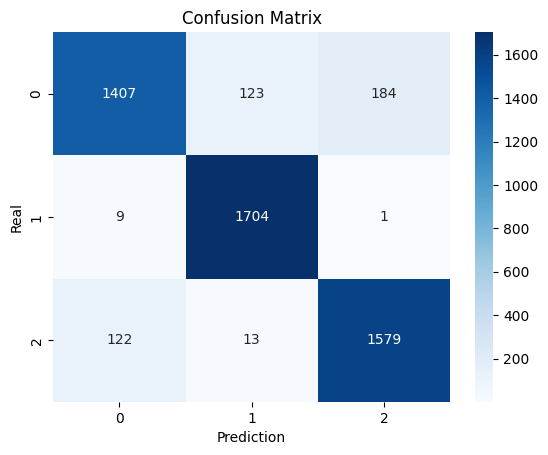



=== Class: 0 (index 0) ===

Top 5 features for class 0:
2024 (3.1349)
2025 (2.5255)
na (2.3254)
historia (2.1440)
afd (2.0672)

Top 5 features against class 0:
wykop (-3.0867)
moderacja (-3.0728)
lgbt (-2.4725)
żydzi (-2.3970)
covid (-2.3100)

Top 5 the most discrimative features 0:
2024 (diff=3.8486, coef=3.1349)
historia (diff=3.1807, coef=2.1440)
afd (diff=2.9448, coef=2.0672)
proces (diff=2.7258, coef=1.8688)
ponad (diff=2.5285, coef=1.7019)


=== Class: 1 (index 1) ===

Top 5 features for class 1:
wośp (3.3036)
mentzen (2.4305)
owsiak (2.4115)
na raz (2.3616)
musk (2.2920)

Top 5 features against class 1:
przez (-3.0818)
na (-2.7031)
że (-2.6419)
nie (-2.4063)
ich (-2.2296)

Top 5 the most discrimative features 1:
wośp (diff=4.5694, coef=3.3036)
owsiak (diff=3.5637, coef=2.4115)
na raz (diff=3.3224, coef=2.3616)
musk (diff=3.2216, coef=2.2920)
mentzen (diff=3.1512, coef=2.4305)


=== Class: 2 (index 2) ===

Top 5 features for class 2:
moderacja (5.1476)
lgbt (3.7527)
covid (3.49

In [151]:
# Retraining
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text_no_tags", y_column="label")

show_most_important_words_multiclass(model, 5)

With Tags:
```sh
              precision    recall  f1-score   support

           0      0.950     0.856     0.901      1714
           1      0.925     0.995     0.958      1714
           2      0.936     0.957     0.946      1714

    accuracy                          0.936      5142
   macro avg      0.937     0.936     0.935      5142
weighted avg      0.937     0.936     0.935      5142
```

Wihtout Tags: 
```sh
              precision    recall  f1-score   support

           0      0.909     0.820     0.862      1714
           1      0.927     0.991     0.958      1714
           2      0.893     0.919     0.906      1714

    accuracy                          0.910      5142
   macro avg      0.910     0.910     0.909      5142
weighted avg      0.910     0.910     0.909      5142
```

Class 0 and 2 are the most affected - they are most likely using some tags to get better results. Class 1 is mostly not affected. The drop in effectiveness is slight - the recall is very high - which is desirable for class 1 and 2 especially.

### Try only 2 labels classification

In [152]:
df["label"] = df["scores"].apply(lambda x: 0 if x < 0.5 else 1)

df["label"].value_counts(normalize=True)

label
0    0.714929
1    0.285071
Name: proportion, dtype: float64

              precision    recall  f1-score   support

           0      0.899     0.900     0.900      1714
           1      0.749     0.747     0.748       684

    accuracy                          0.857      2398
   macro avg      0.824     0.824     0.824      2398
weighted avg      0.856     0.857     0.856      2398



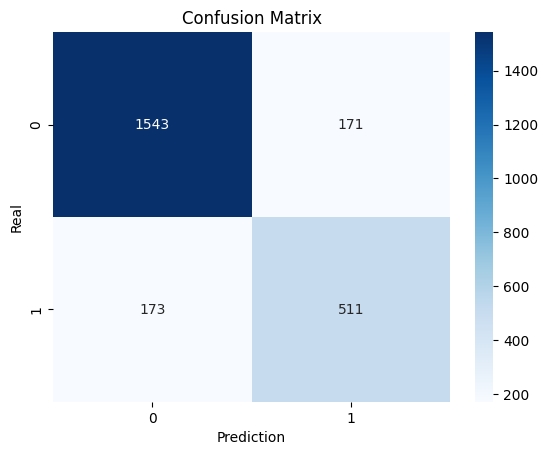

In [153]:
model = train_tfidf_logistic_regression_model(df, x_column="clean_text", y_column="label")

### With balancing

              precision    recall  f1-score   support

           0      0.873     0.901     0.887      1715
           1      0.898     0.869     0.883      1714

    accuracy                          0.885      3429
   macro avg      0.885     0.885     0.885      3429
weighted avg      0.885     0.885     0.885      3429



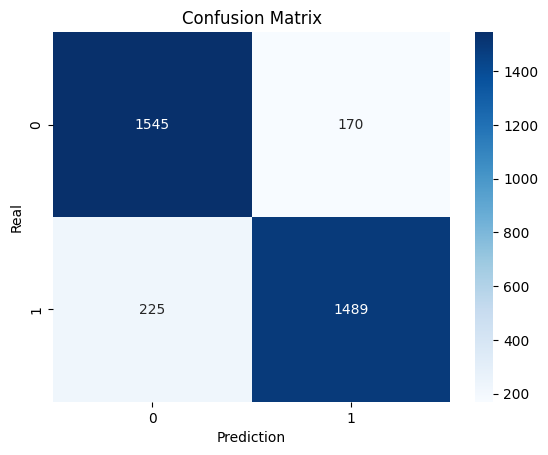

In [154]:
from sklearn.utils import resample

majority = df[df.label == 0]
minority = df[df.label == 1]

minority_upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42)

df_balanced = pd.concat([majority, minority_upsampled])

# Retraining
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text", y_column="label")

In [155]:
show_most_important_words_multiclass(model, 5)



=== Class: 0 (index 0) ===

Top 5 features for class 0:
swiat (8.3462)
koronawirus (7.7246)
wykop (6.5673)
covid19 (5.5959)
4konserwy (5.1588)

Top 5 features against class 0:
gospodarka (-3.3705)
nieruchomosci (-3.2919)
wydarzenia (-2.9357)
2024 (-2.8745)
historia (-2.6778)


### Now with excluded tags

              precision    recall  f1-score   support

           0      0.837     0.853     0.845      1715
           1      0.850     0.834     0.842      1714

    accuracy                          0.843      3429
   macro avg      0.844     0.843     0.843      3429
weighted avg      0.844     0.843     0.843      3429



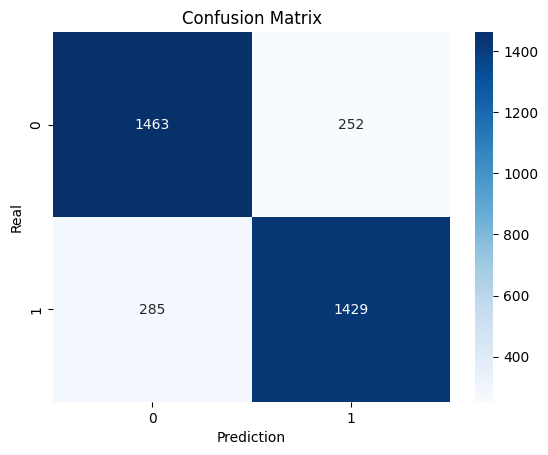



=== Class: 0 (index 0) ===

Top 5 features for class 0:
moderacja (5.9006)
wykop (4.6074)
covid (4.5666)
lgbt (4.4779)
żydzi (3.4189)

Top 5 features against class 0:
2024 (-3.3381)
2025 (-2.6446)
historia (-2.4077)
na (-2.2088)
trump (-2.1841)


In [156]:
model = train_tfidf_logistic_regression_model(df_balanced, x_column="clean_text_no_tags", y_column="label")

show_most_important_words_multiclass(model, 5)